# OC PROJET 4 - CLIENT SEGMENTATION
#### CLEANING AND ANALYSIS NOTEBOOK
<br></br>
### SOMMAIRE
- <a href="#C1">I. Nettoyage et fusion des données</a>
    - 1. Importation des librairies
    - 2. Paramétrages Data Visualisation
    - 3. Merging vers un dataframe principal
    - 4. Gestion des valeurs manquantes et doublons
    - 5. Conversion des variables
    - 6. Gestion des outliers
    - 7. Vérifications et sauvegarde du dataset cleané
    
- <a href="#C2">II. Feature Engineering</a>
     - 1. Création de nouvelles variables
     - 2. Création de variables de groupes et d'interaction
     - 3. Création de variables de fréquence d'achat
     - 4. Création de variables de valeur client  
    
- <a href="#C3">III. Exploration des données</a>
    - 1. Matrice des corrélations
    - 2. Analyse temporelle
    - 3. Analyse Quanti/Quanti
    - 4. Analyse Quanti/Quali
    - 5. Analyse Quali/Quali
    - 6. ACP

# <a name="C1">I. Nettoyage et fusion des données</a>

<font size="5">1. Importation des librairies</font>

In [5]:
# importation des librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<font size="5">2. Paramétrages Data Visualisation</font>

In [72]:
# Ajouter une ombre à la police
shadow = path_effects.withSimplePatchShadow(offset=(1, - 0.75), 
shadow_rgbFace='darkblue', alpha = 0.25)

# changer la police dans les graphiques, les couleurs 
# et augmenter la résolution d'affichage
plt.rcParams['font.family'] = 'Ebrima'
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('dark_background')

# set le theme seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.2',
'text.color': 'white', 'figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'

# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

<font size="5">3. Merging vers un dataframe principal</font>

<i>Remarque : j'ai décider de ne pas inclure le dataset geolocation dans le merge étant donné 
que nous avons déjà les infos similaires dans les autres dataset (code postal, ville, état)</i>

In [44]:
# chargement multiple des dataframes
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_review = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_products_cat = pd.read_csv('product_category_name_translation.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [45]:
# fusion des dataframes vers un dataframe principal
df_merged = pd.merge(df_customers, df_orders, on='customer_id', how = 'left')
df_merged_a = pd.merge(df_merged, df_order_review, how = 'left', on = 'order_id')
df_merged_b = pd.merge(df_merged_a, df_order_items, how = 'left', on = 'order_id')
df_merged_c = pd.merge(df_merged_b, df_products, how = 'left', on = 'product_id')
df_merged_d = pd.merge(df_merged_c, df_products_cat, how = 'left', on = 'product_category_name')
df_merged_e = pd.merge(df_merged_d, df_sellers, how = 'left', on = 'seller_id')
df = pd.merge(df_merged_e, df_order_payments, how = 'left', on = 'order_id')

Faire un diagramme sur le dataframe, là ou on merge, sur quelle clé etc... (voir exemple sur kaggle) diagram database site

Suite : je n'ai pas trouver d'exemple

In [46]:
df.shape

(119143, 40)

In [47]:
# affichage du dataframe principal
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,1.0,ccb4503d9d43d245d3

<font size="5">4. Gestion des doublons et valeurs manquantes</font>

In [48]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542


Note : "La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes."

Source : https://www.definitions-marketing.com/definition/segmentation-rfm/

In [49]:
# suppression des variables inutiles
df = df.drop(columns = ['order_approved_at', 'order_delivered_carrier_date',
'order_estimated_delivery_date', 'review_id', 'review_answer_timestamp',
'order_item_id', 'payment_sequential', 'product_name_lenght', 
'product_description_lenght', 'product_photos_qty', 'product_weight_g',
'product_length_cm', 'product_height_cm', 'product_width_cm',
'product_category_name', 'shipping_limit_date', 'customer_zip_code_prefix',
'seller_zip_code_prefix', 'review_creation_date'])

In [50]:
# suppression des variables qui contiennent trop de valeurs manquantes
# et qui ne peuvent pas être restituées ou recalculées
df = df.drop(columns = ['review_comment_title', 'review_comment_message'])

In [51]:
# suppression des valeurs manquantes
df = df.dropna()

In [52]:
# check des doublons
df.loc[df.duplicated(keep = False),:]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value
22,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-25 22:30:58,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,59.90,17.67,garden_tools,sao jose do rio preto,SP,credit_card,2.0,232.71
23,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-25 22:30:58,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,59.90,17.67,garden_tools,sao jose do rio preto,SP,credit_card,2.0,232.71
24,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-25 22:30:58,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,59.90,17.67,garden_tools,sao jose do rio preto,SP,credit_card,2.0,232.71
50,19cecb194f54e614b70d971306a9931b,d251c190ca75786e9ab937982d60d1d4,belo horizonte,MG,14282bc70be9bdda515182fb1ce62af4,delivered,2018-04-18 14:18:09,2018-04-26 16:26:38,2.0,b05e00841a6dad404ef34ae67807879a,aac29b1b99776be73c3049939652091d,11.99,13.47,furniture_decor,uberlandia,MG,boleto,1.0,50.92
51,19cecb194f54e614b70d971306a9931b,d251c190ca75786e9ab937982d60d1d4,belo horizonte,MG,14282bc70be9bdda515182fb1ce62af4,delivered,2018-04-18 14:18:09,2018-04-26 16:26:38,2.0,b05e00841a6dad404ef34ae67807879a,aac29b1b99776be73c3049939652091d,11.99,13.47,furniture_decor,uberlandia,MG,boleto,1.0,50.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119112,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-03-16 20:03:53,1.0,e8316a4667e5870c85e906b1f062bde1,7c67e1448b00f6e969d365cea6b010ab,79.99,30.40,office_furniture,itaquaquecetuba,SP,credit_card,6.0,662.34
119113,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:12,2018-02-07 17:42:55,5.0,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.90,14.10,electronics,sao paulo,SP,credit_card,8.0,86.49
119114,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:12,2018-02-07 17:42:55,5.0,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.90,14.10,electronics,sao paulo,SP,voucher,1.0,1.51
119115,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:12,2018-02-07 17:42:55,5.0,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.90,14.10,electronics,sao paulo,SP,credit_card,8.0,86.49


In [53]:
# Suppression des doublons
df.drop_duplicates(inplace=True)

In [54]:
df

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,office_furniture,itaquaquecetuba,SP,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,itajai,SC,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,office_furniture,itaquaquecetuba,SP,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,itaquaquecetuba,SP,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,home_confort,ibitinga,SP,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,books_general_interest,garca,SP,credit_card,6.0,88.78
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,sports_leisure,araraquara,SP,credit_card,3.0,129.06
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,health_beauty,sao paulo,SP,credit_card,5.0,56.04
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,watches_gifts,guariba,SP,credit_card,2.0,711.07


<font size="5">5. Conversion des variables</font>

In [55]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
review_score                     float64
product_id                        object
seller_id                         object
price                            float64
freight_value                    float64
product_category_name_english     object
seller_city                       object
seller_state                      object
payment_type                      object
payment_installments             float64
payment_value                    float64
dtype: object

In [56]:
# /!\ le saut à la ligne pour respecter la convention
# PEP 8 casse le code, j'ai donc laisser intentionnelement
# des lignes de plus de 79 charactères dans cette cellule

# création de deux nouvelles variables en faisant
# une conversion vers le format datetime
df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_customer_date'])

# supression des anciennes colonnes du mauvais dtype
df = df.drop(columns=['order_purchase_timestamp', 'order_delivered_customer_date'])

In [57]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
review_score                            float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_city                              object
seller_state                             object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_purchase_datetime          datetime64[ns]
order_delivered_datetime         datetime64[ns]
dtype: object

In [43]:
df

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value,order_purchase_datetime,order_delivered_datetime
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,office_furniture,itaquaquecetuba,SP,credit_card,2.0,146.87,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,itajai,SC,credit_card,8.0,335.48,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,office_furniture,itaquaquecetuba,SP,credit_card,7.0,157.73,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,itaquaquecetuba,SP,credit_card,1.0,173.30,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,home_confort,ibitinga,SP,credit_card,8.0,252.25,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,books_general_interest,garca,SP,credit_card,6.0,88.78,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,sports_leisure,araraquara,SP,credit_card,3.0,129.06,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,health_beauty,sao paulo,SP,credit_card,5.0,56.04,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,watches_gifts,guariba,SP,credit_card,2.0,711.07,<function to_datetime at 0x00000288F7708790>,<function to_datetime at 0x00000288F7708790>


In [19]:
# fonction pour checker si les variables 
# ne contiennent pas de valeurs infinies
def infinite_check(df):
    for col in df.columns:
        if df[col].dtype.kind in 'biufc' and np.isinf(df[col]).any():
            print(f"La colonne {col} contient des valeurs égales à infini.")

In [20]:
infinite_check(df)

<font size="5">6. Gestion des outliers</font>

In [21]:
df.describe()

,customer_zip_code_prefix,review_score,price,freight_value,seller_zip_code_prefix,payment_installments,payment_value
count,102338.000000,102338.000000,102338.000000,102338.000000,102338.000000,102338.000000,102338.000000
mean,35093.253532,4.124685,123.513448,20.116015,24655.582482,2.909261,157.337783
std,29796.223031,1.310770,186.341288,15.796253,27699.472232,2.731764,216.105939
min,1003.000000,1.000000,0.850000,0.000000,1001.000000,0.000000,0.000000
25%,11340.000000,4.000000,40.000000,13.160000,6429.000000,1.000000,58.270000
50%,24360.000000,5.000000,78.000000,16.360000,13720.000000,2.000000,102.660000
75%,58623.750000,5.000000,138.500000,21.240000,29156.000000,4.000000,176.675000
max,99980.000000,5.000000,6735.000000,409.680000,99730.000000,24.000000,13664.080000


Analyse du describe : 
- Pas de valeurs négatives à signaler
- Pour le code postal : la valeur max est 99980 donc visiblement pas de outliers ici
- Le review score va de 1 à 5 donc pas d'anomalie ici
- Vérifier pour le 6735€ prix max et 409€ de frais de port max
- Il existe un paiement à 13664€ alors que le prix le plus haut d'un produit est 6735€
- Attention également aux paiments avec une valeur égale à 0

In [58]:
# quelques corrections après l'analyse du describe
df = df[df['payment_value'] <= 6735]
df = df[df['payment_value'] > 0]

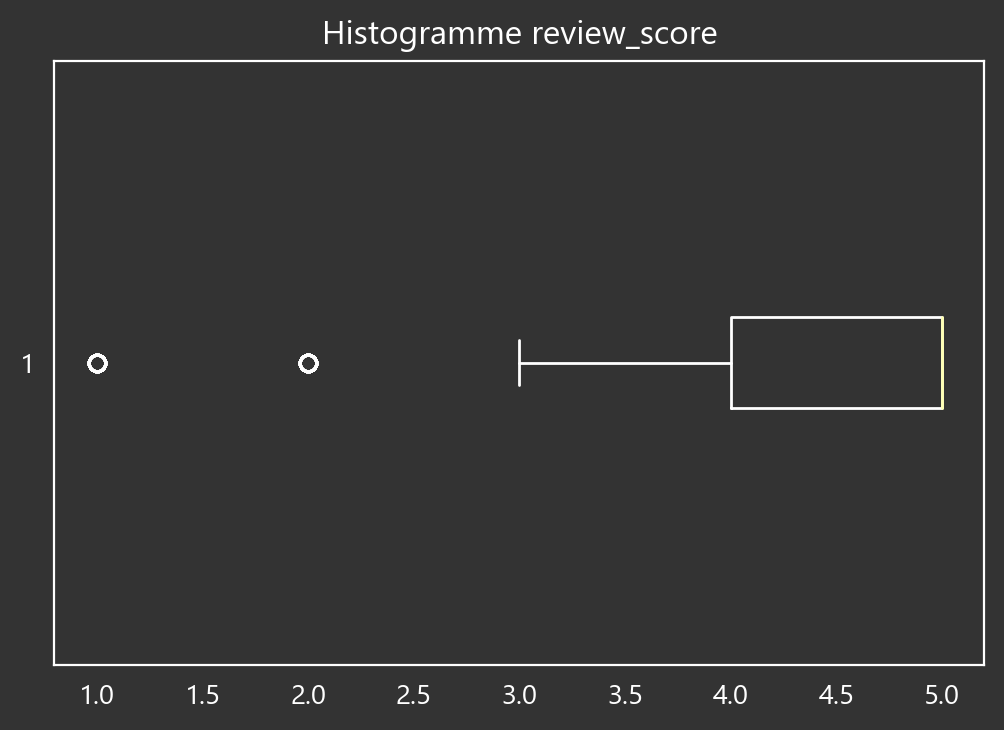

review_score


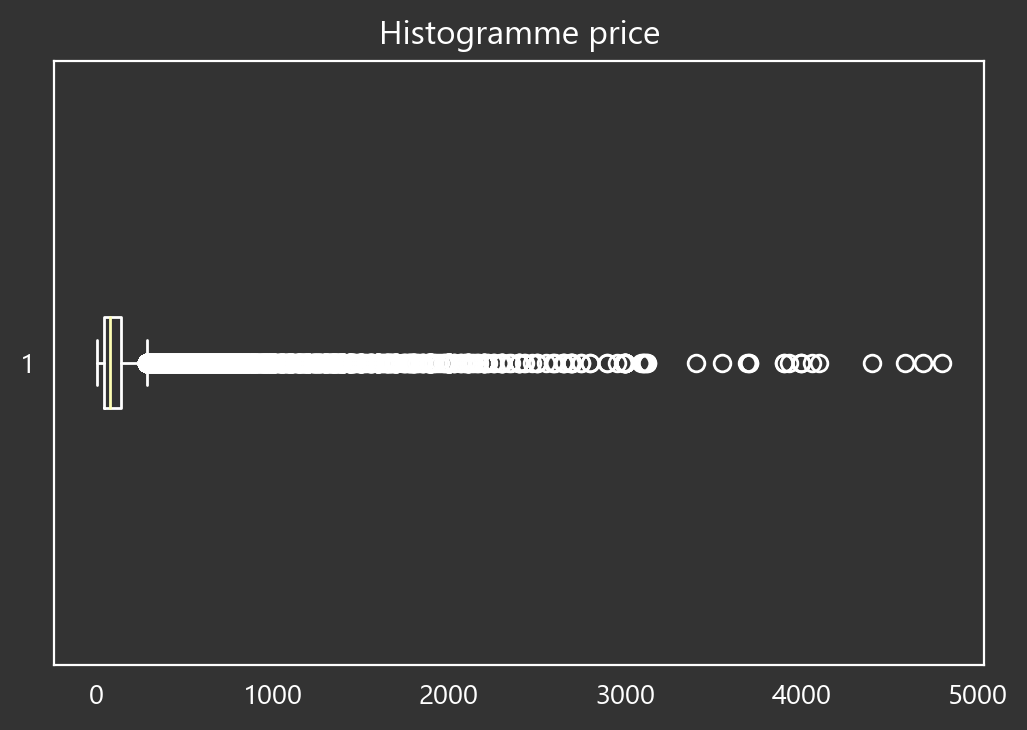

price


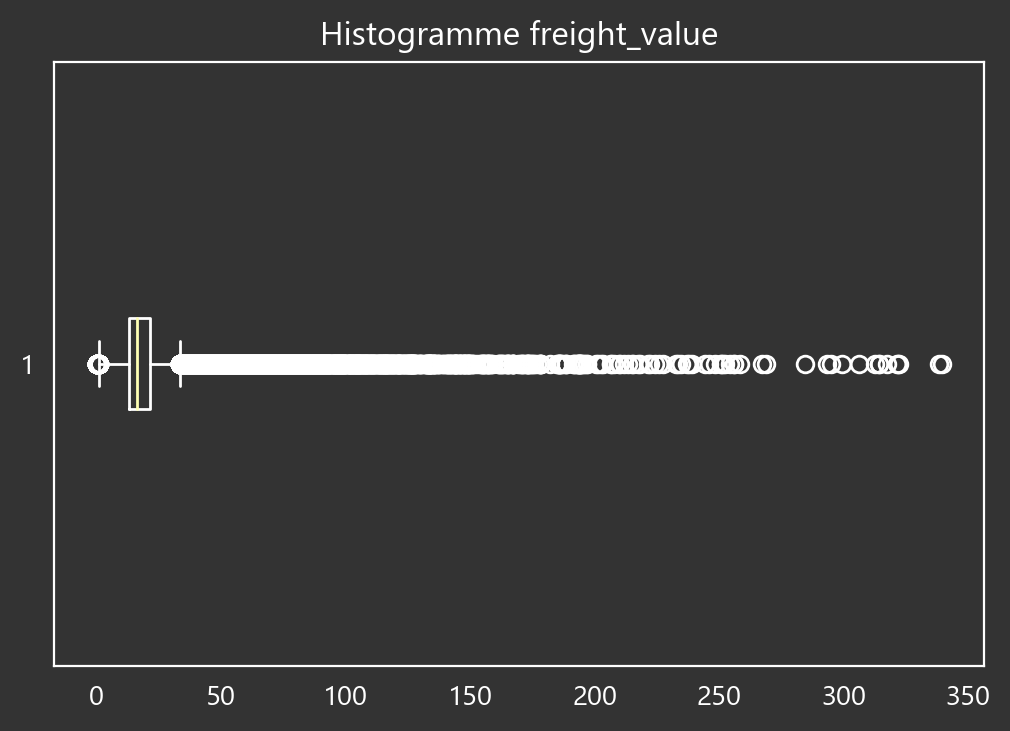

freight_value


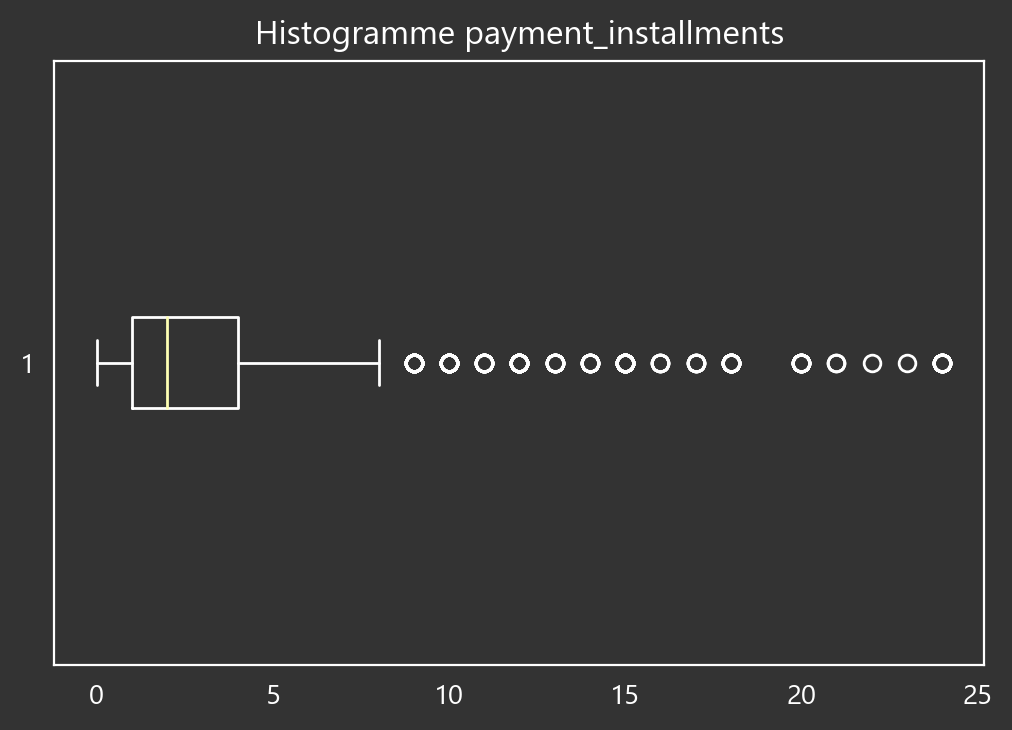

payment_installments


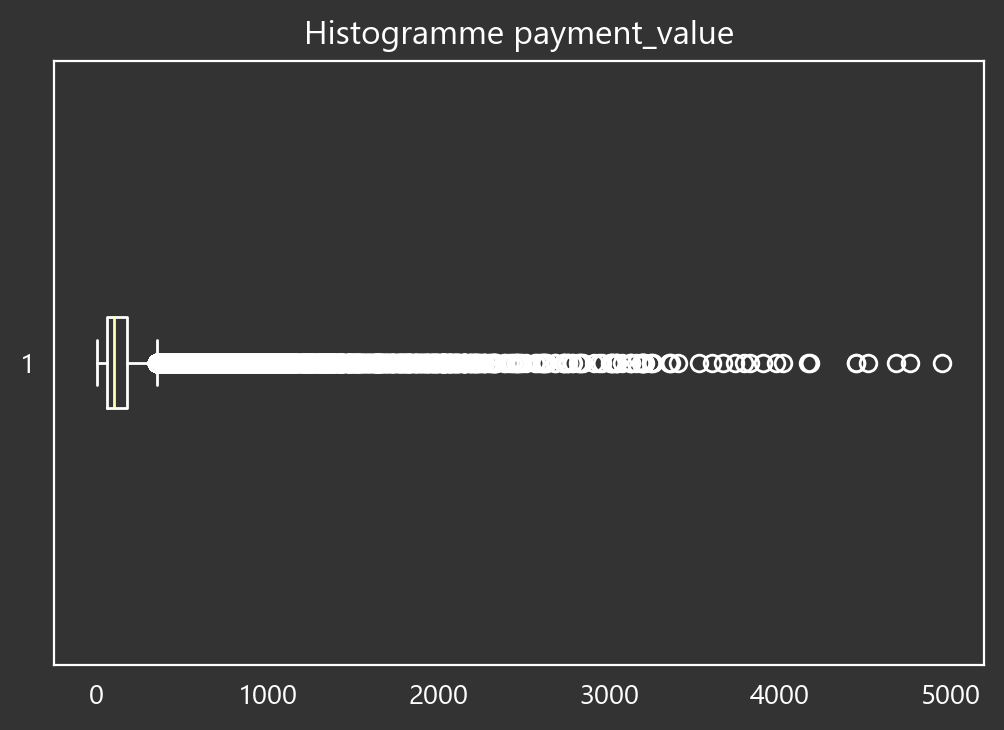

payment_value


In [73]:
plt.rcParams['font.family'] = 'Ebrima'
# on vérifie avec les boxplot
list_columns = ['review_score', 'price', 'freight_value', 
'payment_installments', 'payment_value']

for columns_name in list_columns:
    plt.grid(False)
    plt.title(f"Histogramme {columns_name}")
    plt.boxplot(df[columns_name], vert = False)
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.show()
    print(columns_name)

In [68]:
# correction après l'analyse des boxplot
df = df[df['price'] <= 5000]
df = df[df['payment_value'] <= 5000]
df = df[df['freight_value'] <= 360]
df.shape

(102084, 19)

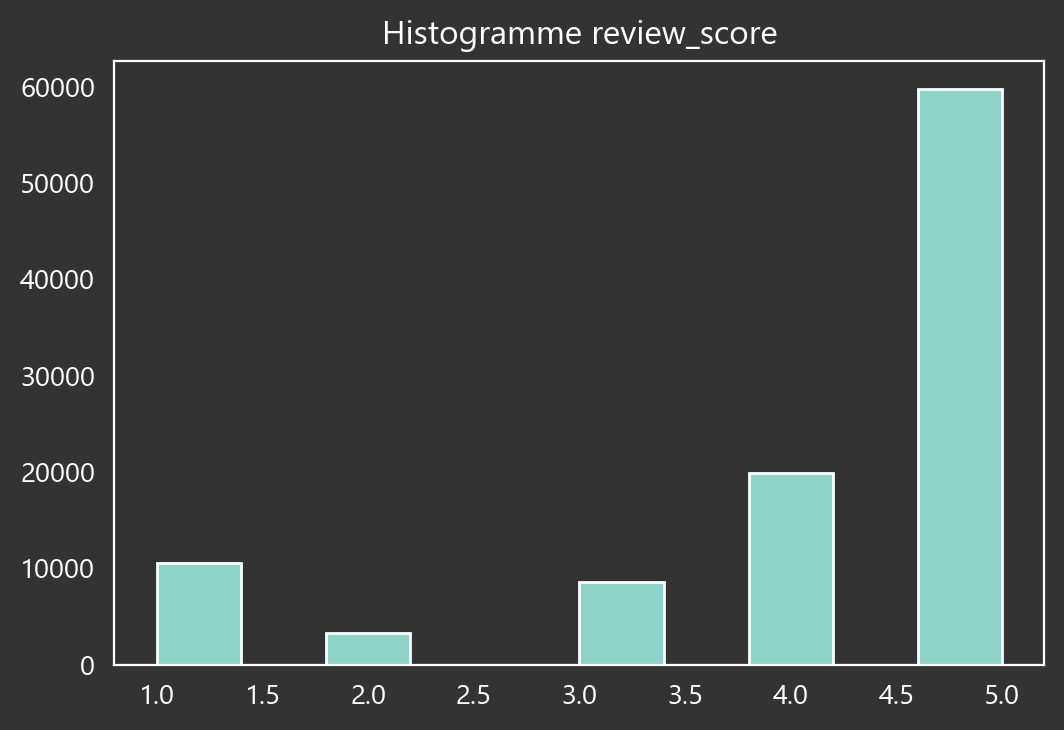

review_score


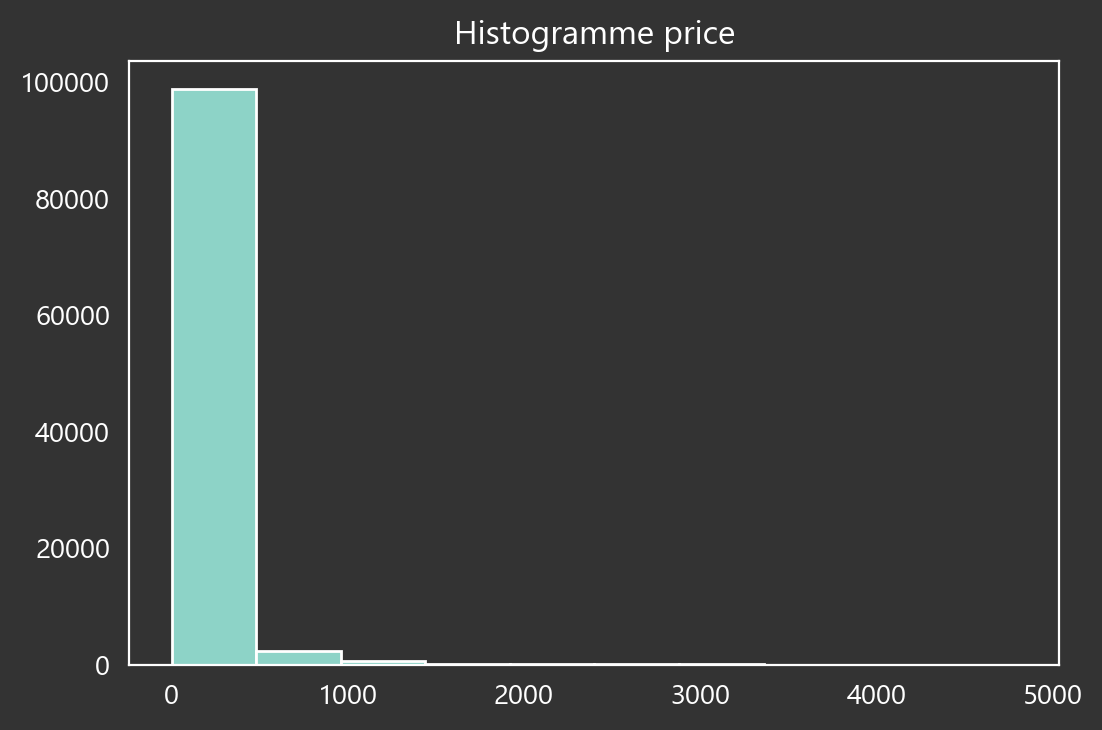

price


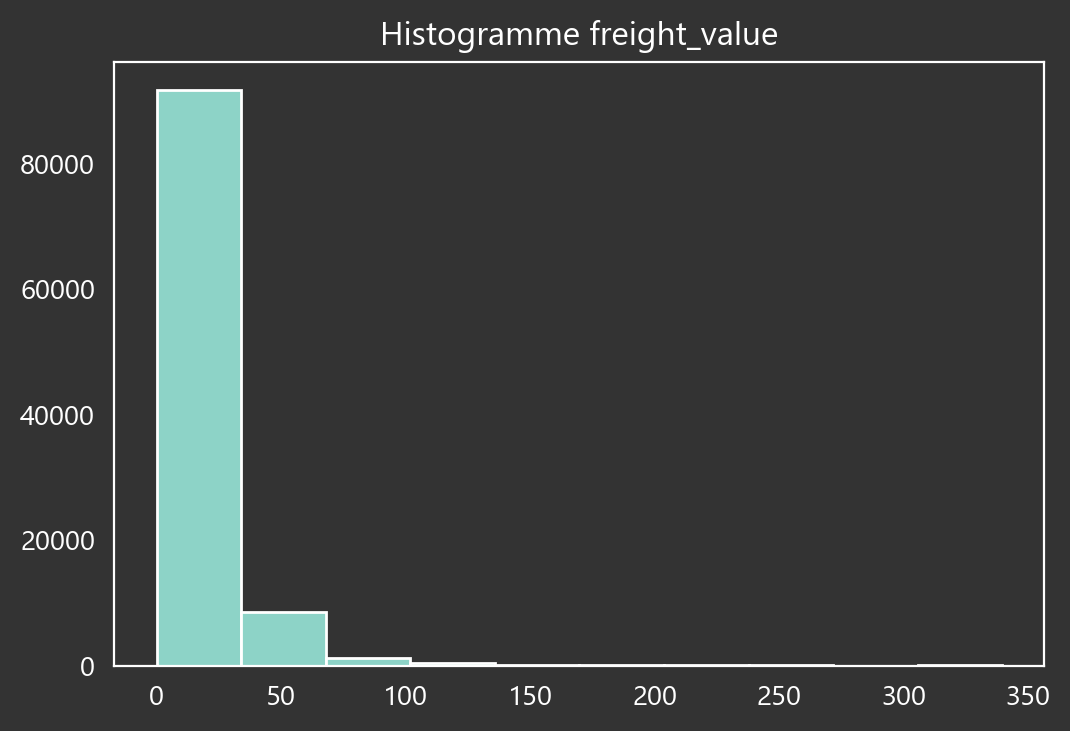

freight_value


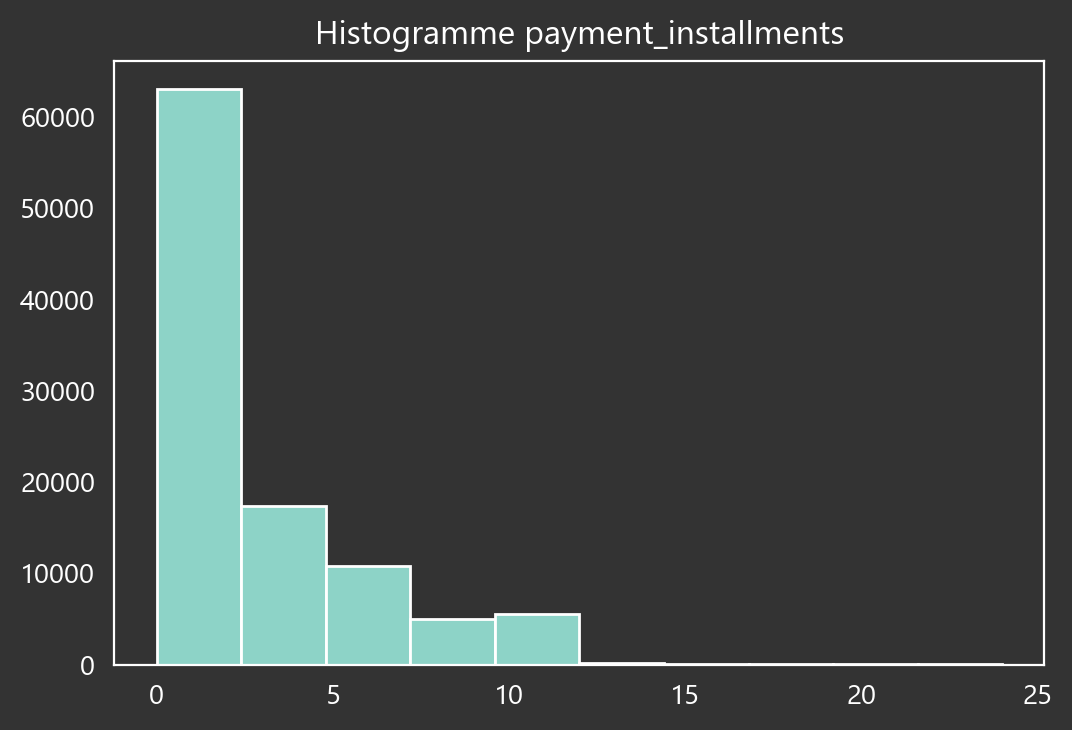

payment_installments


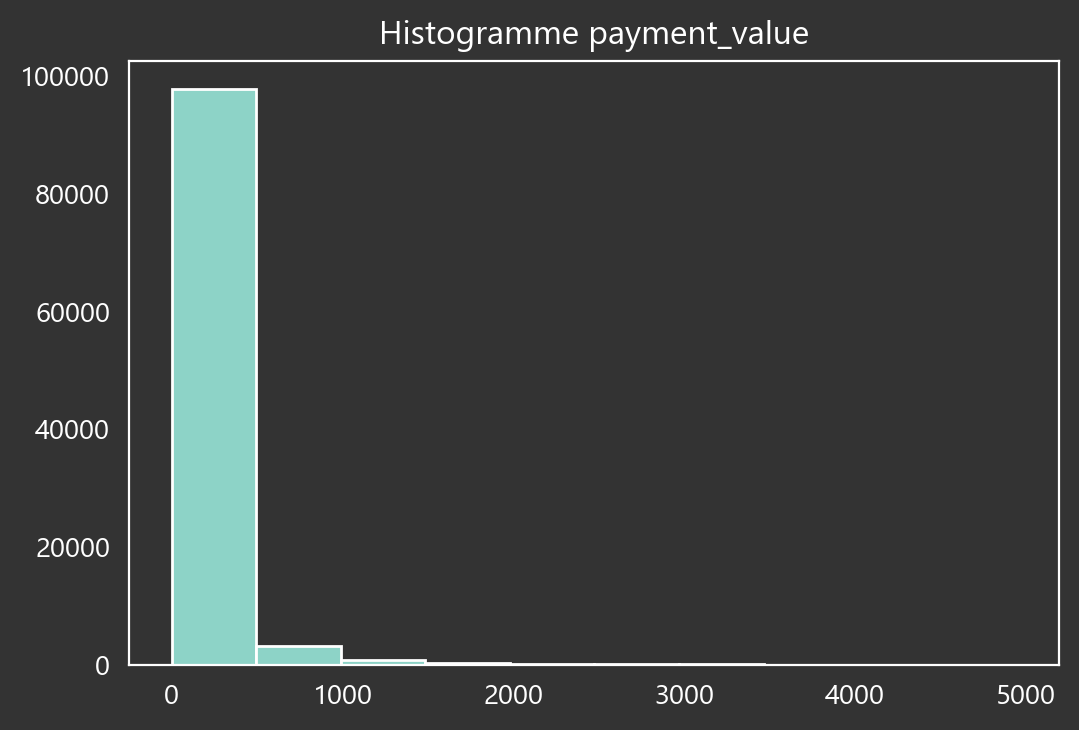

payment_value


In [74]:
# on vérifie que la distribution des variables est correcte
list_columns = ['review_score', 'price', 'freight_value', 
'payment_installments', 'payment_value']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df[columns_name])
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.grid(False)
    plt.show()
    print(columns_name)

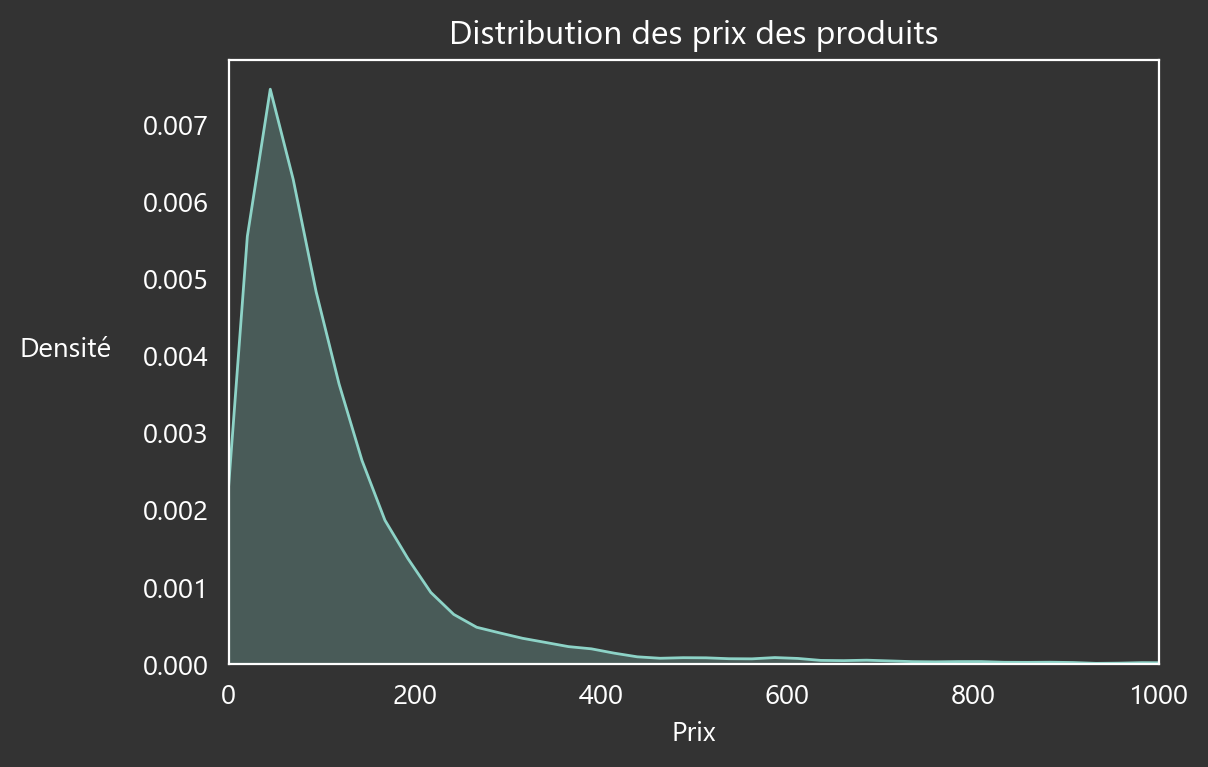

In [80]:
# Tracer la distribution des prix
sns.kdeplot(df['price'], shade = True)
plt.xlabel('Prix', color = 'white')
plt.gca().yaxis.set_label_coords(-0.175, 0.5)
plt.ylabel('Densité', color = 'white', rotation = 360)
plt.title('Distribution des prix des produits', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.xlim(0, 1000)
plt.show()

<font size="5">7. Vérification et sauvegarde du dataframe cleané</font>

In [81]:
df

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value,order_purchase_datetime,order_delivered_datetime
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,office_furniture,itaquaquecetuba,SP,credit_card,2.0,146.87,2017-05-16 15:05:35,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,itajai,SC,credit_card,8.0,335.48,2018-01-12 20:48:24,2018-01-29 12:41:19
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,office_furniture,itaquaquecetuba,SP,credit_card,7.0,157.73,2018-05-19 16:07:45,2018-06-14 17:58:51
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,itaquaquecetuba,SP,credit_card,1.0,173.30,2018-03-13 16:06:38,2018-03-28 16:04:25
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,home_confort,ibitinga,SP,credit_card,8.0,252.25,2018-07-29 09:51:30,2018-08-09 20:55:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,books_general_interest,garca,SP,credit_card,6.0,88.78,2018-04-07 15:48:17,2018-04-13 20:06:37
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,sports_leisure,araraquara,SP,credit_card,3.0,129.06,2018-04-04 08:20:22,2018-04-11 18:54:45
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,health_beauty,sao paulo,SP,credit_card,5.0,56.04,2018-04-08 20:11:50,2018-05-09 19:03:15
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,watches_gifts,guariba,SP,credit_card,2.0,711.07,2017-11-03 21:08:33,2017-11-16 19:58:39


In [82]:
# vérification des types
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
review_score                            float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_city                              object
seller_state                             object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_purchase_datetime          datetime64[ns]
order_delivered_datetime         datetime64[ns]
dtype: object

In [83]:
# vérification des doublons
df.loc[df.duplicated(keep = False),:]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value,order_purchase_datetime,order_delivered_datetime


In [84]:
# vérification des valeurs nulles
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
review_score                     0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name_english    0
seller_city                      0
seller_state                     0
payment_type                     0
payment_installments             0
payment_value                    0
order_purchase_datetime          0
order_delivered_datetime         0
dtype: int64

In [85]:
# fonction pour checker si les variables ne contiennent pas de valeurs infinies
def infinite_check(df):
    for col in df.columns:
        if df[col].dtype.kind in 'biufc' and np.isinf(df[col]).any():
            print(f"La colonne {col} contient des valeurs égales à infini.")

In [88]:
# vérification des valeurs infinies
infinite_check(df)

In [87]:
# sauvegarde du dataframe
df.to_csv('olist_master.csv', index = False)

# <a name="C2">II. Feature Engineering</a>

<font size="5">1. Ajout de variables temporelles</font>

In [89]:
# création des variables temporelles
df['month'] = pd.to_datetime(df['order_purchase_datetime']).dt.month
df['year'] = pd.to_datetime(df['order_purchase_datetime']).dt.year

In [90]:
# Créer la variable temps de livraison
df['delivery_time_days'] = (pd.to_datetime(df['order_delivered_datetime']) - 
pd.to_datetime(df['order_purchase_datetime'])).dt.days

<font size="5">2. Création de variables de groupes et d'interaction</font>

In [91]:
# création de la variable prix moyen par catégorie de produit
average_price_cat = df.groupby('product_category_name_english')['price'].mean()
df['average_price_cat'] = df['product_category_name_english'].map(average_price_cat)

<font size="5">3. Création de variables de fréquence d'achat</font>

In [97]:
# /!\ le saut à la ligne pour respecter la convention
# PEP 8 casse le code, j'ai donc laisser intentionnelement
# des lignes de plus de 79 charactères dans cette cellule

# Créer la variable du nombre d'achats sur les 3 derniers mois
limit_date = pd.to_datetime('2018-09-01')
df['nb_purchase_last_3_months'] = df[df['order_purchase_datetime'] > 
(limit_date - pd.DateOffset(months=3))].groupby('customer_id')['customer_id'].transform('count')
 # remplacer les valeurs manquantes par 0
df['nb_purchase_last_3_months'].fillna(0, inplace=True)

<font size="5">4. Création de variables de valeur client</font>

In [102]:
# /!\ le saut à la ligne pour respecter la convention
# PEP 8 casse le code, j'ai donc laisser intentionnelement
# des lignes de plus de 79 charactères dans cette cellule

# Créer la variable du montant total des achats effectués par le client
total_purchases = df.groupby('customer_id')['payment_value'].sum()
df['total_amount_client'] = df['customer_id'].map(total_purchases)

# Créer la variable du nombre de produits différents achetés par le client
nb_different_product = df.groupby('customer_id')['product_category_name_english'].nunique()
df['nb_different_product_client'] = df['customer_id'].map(nb_different_product)

# Créer la variable du nombre de jours depuis le dernier achat
last_purchase = df.groupby('customer_id')['order_purchase_datetime'].max()
df['days_since_last_purchase'] = (limit_date - df['customer_id'].map(last_purchase)).dt.days
# remplacer les valeurs manquantes avec le temps écoulé depuis la dernière observation
df['days_since_last_purchase'].fillna((limit_date - df['order_purchase_datetime']).dt.days, inplace=True)

In [103]:
df

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,price,freight_value,product_category_name_english,seller_city,seller_state,payment_type,payment_installments,payment_value,order_purchase_datetime,order_delivered_datetime,month,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,office_furniture,itaquaquecetuba,SP,credit_card,2.0,146.87,2017-05-16 15:05:35,2017-05-25 10:35:35,5,2017,8,165.167374,0.0,146.87,1,472
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,itajai,SC,credit_card,8.0,335.48,2018-01-12 20:48:24,2018-01-29 12:41:19,1,2018,16,92.950906,0.0,335.48,1,231
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,office_furniture,itaquaquecetuba,SP,credit_card,7.0,157.73,2018-05-19 16:07:45,2018-06-14 17:58:51,5,2018,26,165.167374,0.0,157.73,1,104
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,itaquaquecetuba,SP,credit_card,1.0,173.30,2018-03-13 16:06:38,2018-03-28 16:04:25,3,2018,14,165.167374,0.0,173.30,1,171
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,home_confort,ibitinga,SP,credit_card,8.0,252.25,2018-07-29 09:51:30,2018-08-09 20:55:48,7,2018,11,138.526636,1.0,252.25,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,books_general_interest,garca,SP,credit_card,6.0,88.78,2018-04-07 15:48:17,2018-04-13 20:06:37,4,2018,6,85.313205,0.0,88.78,1,146
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,sports_leisure,araraquara,SP,credit_card,3.0,129.06,2018-04-04 08:20:22,2018-04-11 18:54:45,4,2018,7,117.192706,0.0,129.06,1,149
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,health_beauty,sao paulo,SP,credit_card,5.0,56.04,2018-04-08 20:11:50,2018-05-09 19:03:15,4,2018,30,134.284885,0.0,56.04,1,145
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,watches_gifts,guariba,SP,credit_card,2.0,711.07,2017-11-03 21:08:33,2017-11-16 19:58:39,11,2017,12,204.348693,0.0,711.07,1,301


In [104]:
df.describe()

,review_score,price,freight_value,payment_installments,payment_value,month,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase
count,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000,102084.000000
mean,4.124535,123.358986,20.105058,2.907302,156.923253,6.041505,2017.541985,12.009375,123.358986,0.226852,189.192817,1.016722,242.193782
std,1.310513,183.835530,15.656216,2.729909,207.633618,3.220590,0.504042,9.465643,62.178087,0.534980,329.766037,0.131843,153.215675
min,1.000000,0.850000,0.000000,0.000000,0.010000,1.000000,2016.000000,0.000000,28.452917,0.000000,6.150000,1.000000,2.000000
25%,4.000000,40.000000,13.160000,1.000000,58.280000,3.000000,2017.000000,6.000000,93.496093,0.000000,63.117500,1.000000,118.000000
50%,5.000000,78.000000,16.360000,2.000000,102.660000,6.000000,2018.000000,10.000000,117.192706,0.000000,109.970000,1.000000,224.000000
75%,5.000000,138.900000,21.250000,4.000000,176.700000,8.000000,2018.000000,15.000000,134.284885,0.000000,194.480000,1.000000,353.000000
max,5.000000,4799.000000,339.590000,24.000000,4950.340000,12.000000,2018.000000,208.000000,1117.622000,9.000000,15978.650000,3.000000,697.000000


In [106]:
# sauvegarde du dataframe
df.to_csv('olist_master.csv', index=False)

In [107]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
review_score                            float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_city                              object
seller_state                             object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_purchase_datetime          datetime64[ns]
order_delivered_datetime         datetime64[ns]
month                                     int64
year                                    

In [131]:
df = pd.read_csv('olist_master.csv')

# on convertit à nouveau les données en format datetime car
# le type à changer entre les chargement de df
df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])

# <a name="C3">III. Exploration des données</a>

<font size="5">1. Matrice des corrélations</font>

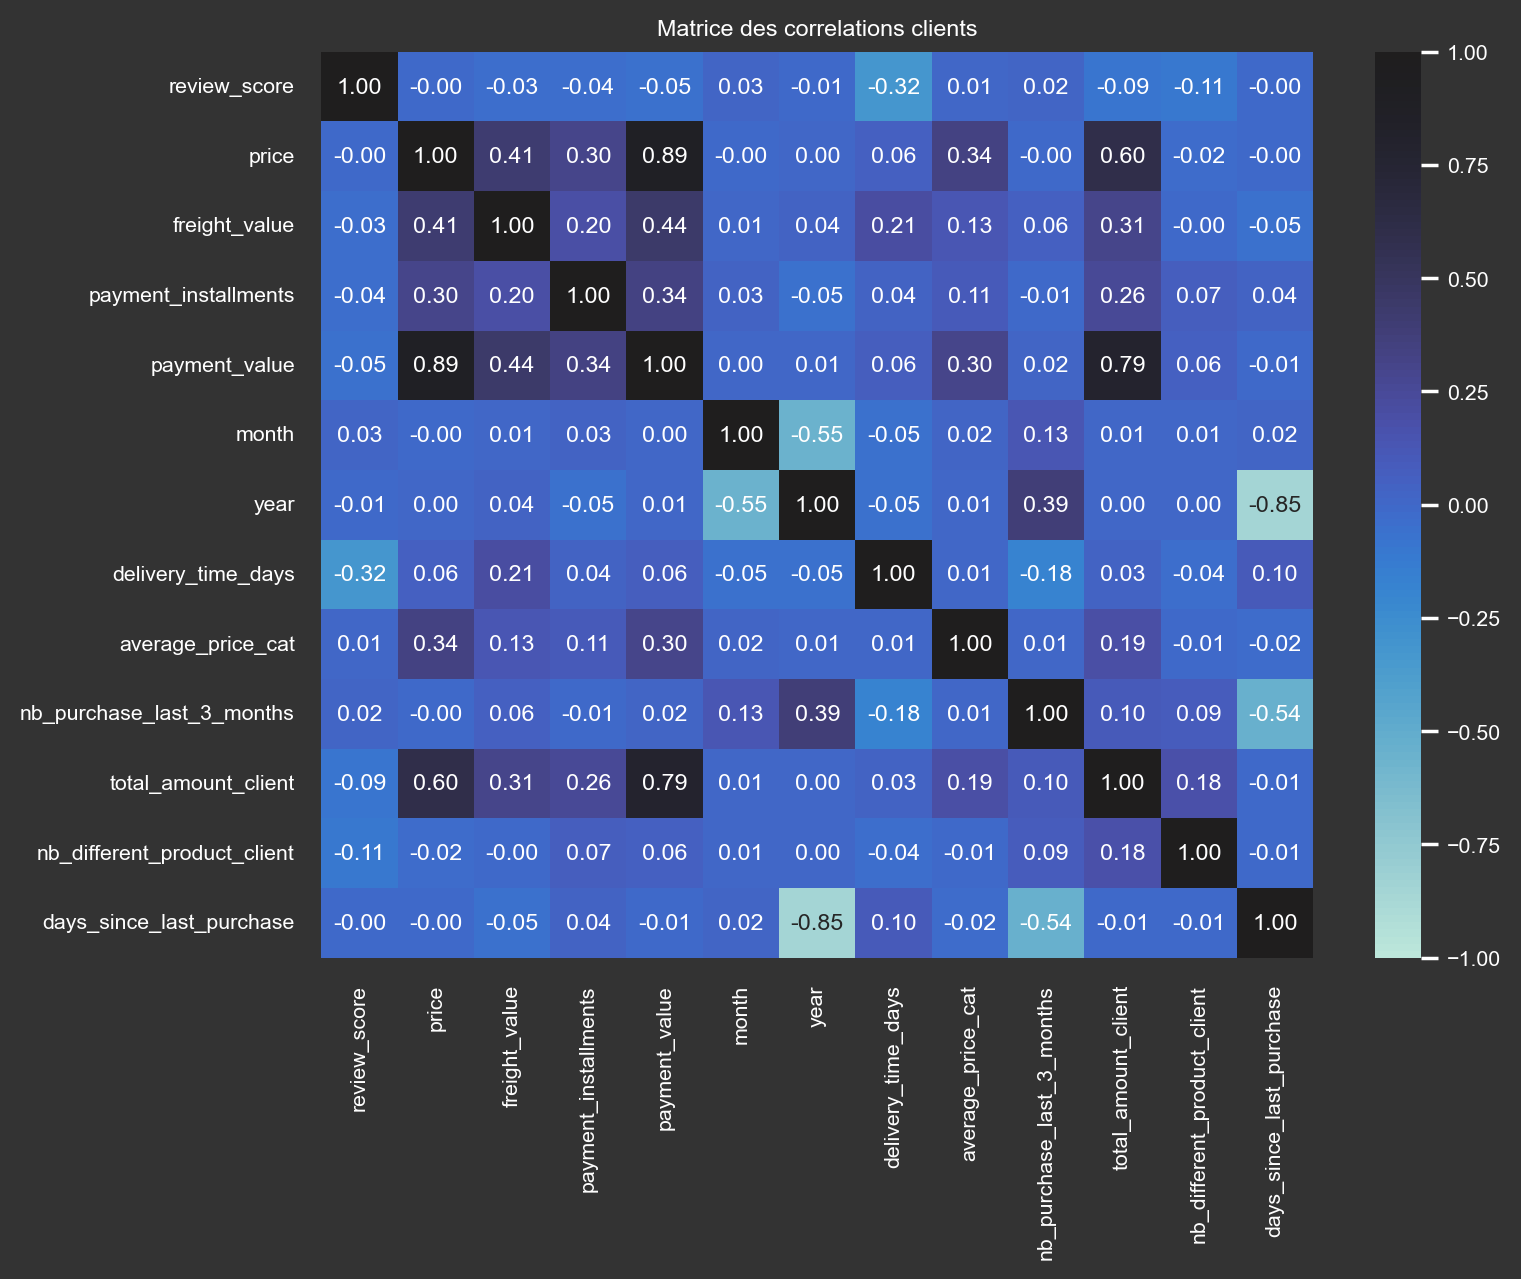

In [132]:
sns.set(font_scale = 0.7, rc = {'axes.labelcolor': 'white', 
'xtick.color': 'white', 'ytick.color': 'white'})
plt.title("Matrice des correlations clients", color = 'white')

sns.heatmap(df.corr(), center = 1, annot = True, 
fmt = ".2f", vmin =- 1, vmax = 1)

# Ajouter une bordure personnalisée avec une couleur de fond grise
fig = plt.gcf()
fig.set_size_inches(8, 6)
fig.patch.set_facecolor('0.2')

plt.show()

Analyse de la matrice des correlations :
- Très forte corrélation positive entre le prix et valeur de paiment (0,89)
- Corrélation positive entre le prix et le nombre de paiment (0,30)
- Corrélation positive entre le prix et les frais de port (0,41)
- Corrélation négative entre le temps de livraison et le review_score (-0.32)

<font size="5">2. Analyse Temporelle</font>

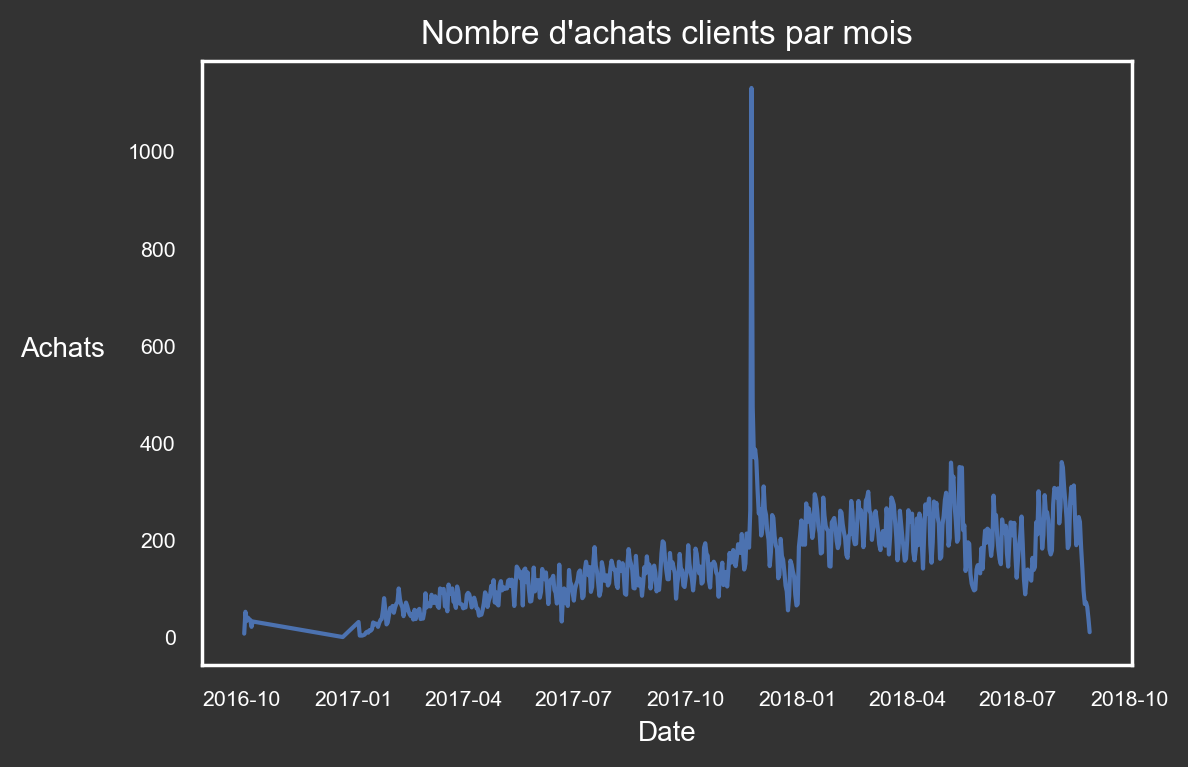

In [134]:
# /!\ le saut à la ligne pour respecter la convention
# PEP 8 casse le code, j'ai donc laisser intentionnelement
# des lignes de plus de 79 charactères dans cette cellule

# set du style sns après la matrice
sns.set_style('darkgrid', {'axes.facecolor': '0.2', 
'text.color': 'white', 'figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'
# Créer une colonne de date à partir 
# de la colonne order_purchase_datetime
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_datetime']).dt.date

# Agréger les données par mois pour le nombre d'achats par client
monthly_purchases = df.groupby(['order_purchase_date'])['customer_id'].nunique()

# Tracer le graphique en ligne
plt.plot(monthly_purchases.index, monthly_purchases.values)
plt.xlabel('Date', color = 'white', fontsize = 10)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)
plt.ylabel('Achats', color = 'white', rotation = '360', fontsize = 10)
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.title("Nombre d'achats clients par mois", fontsize = 12)
plt.grid(False)
plt.show()

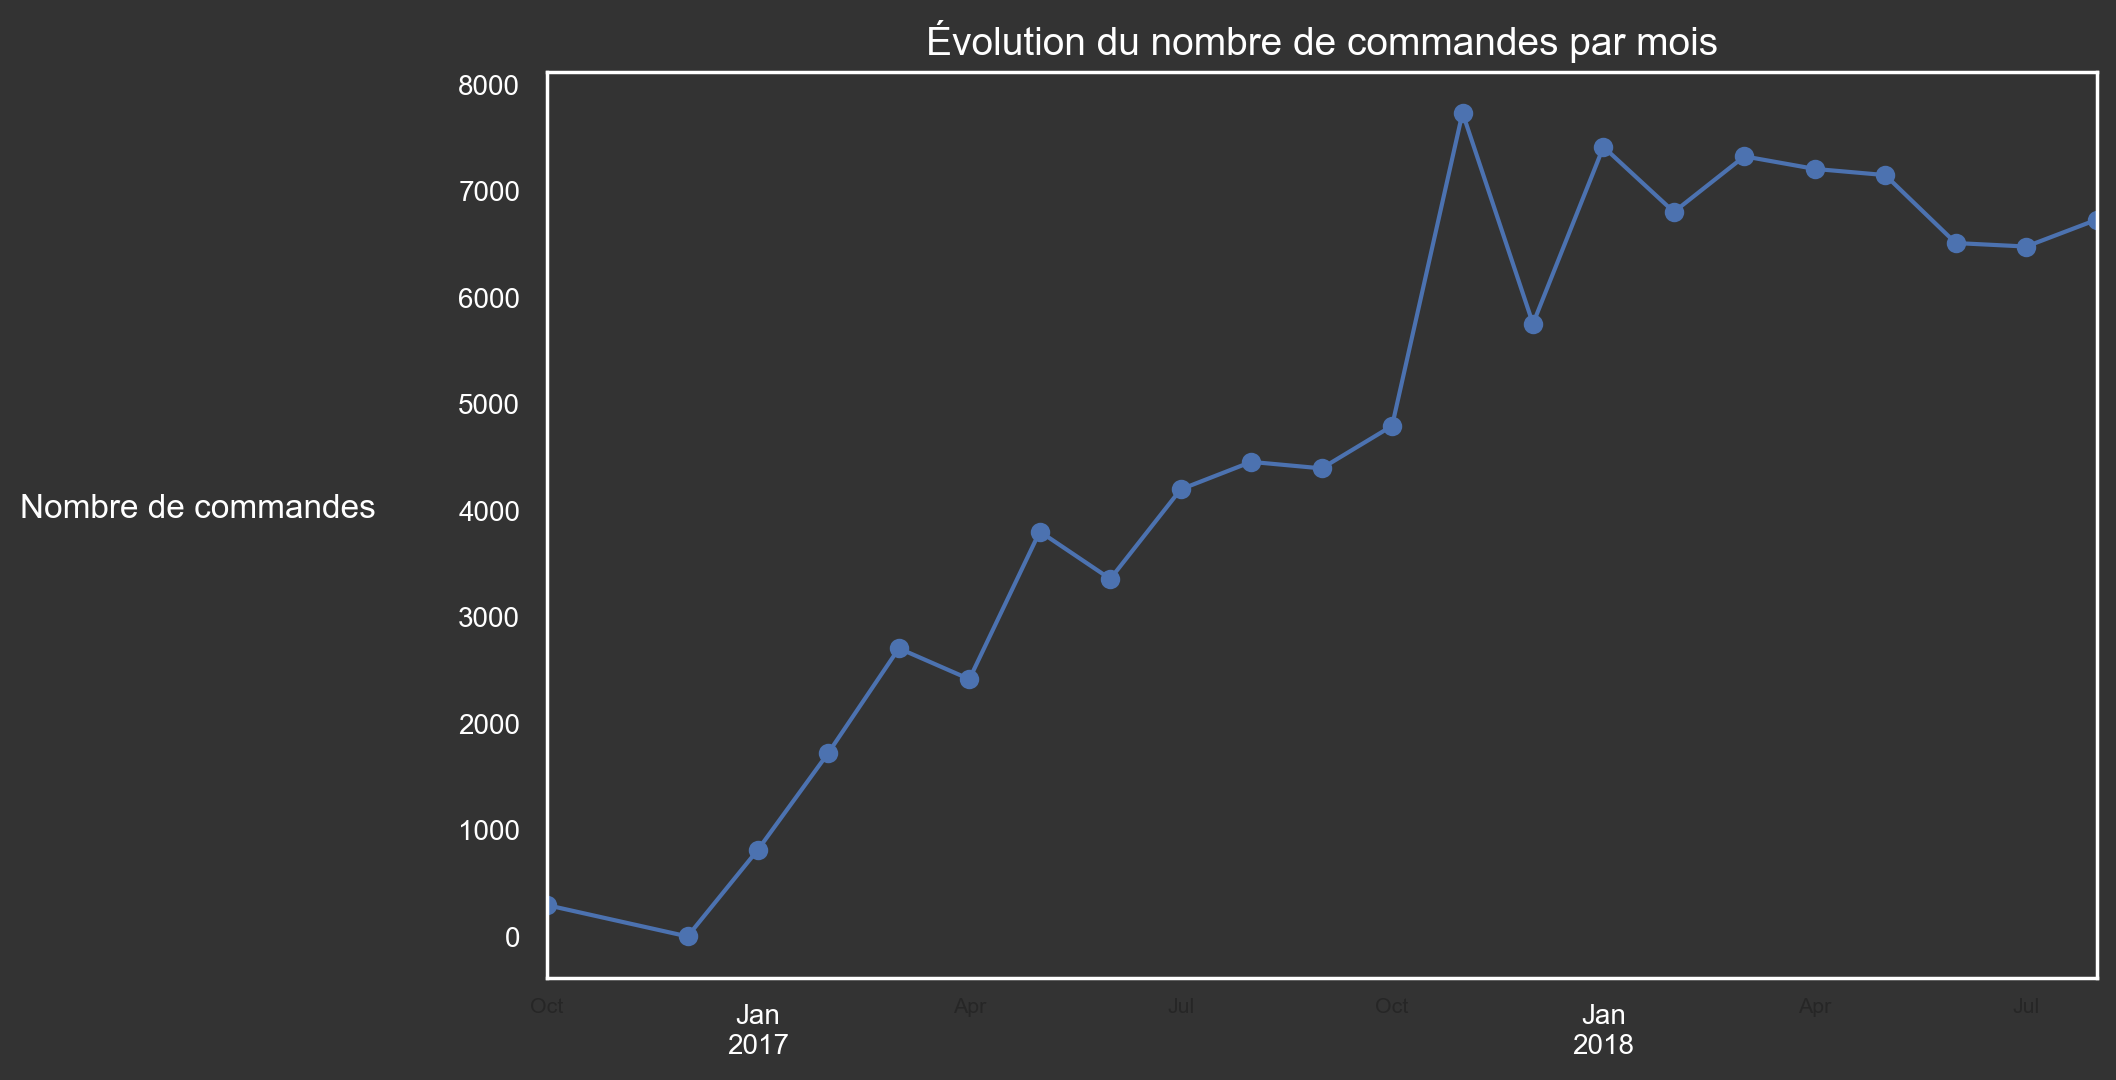

In [112]:
mpl.rcParams['text.color'] = 'white'
# Extraire le mois et l'année à partir 
# de la colonne 'order_purchase_timestamp'
df['month_year'] = df['order_purchase_datetime'].dt.to_period('M')

# Compter le nombre de commandes par mois
orders_per_month = df['month_year'].value_counts().sort_index()

# Afficher l'évolution du nombre de commandes par mois
plt.figure(figsize = (10, 6))
orders_per_month.plot(kind = 'line', marker = 'o')
plt.title("Évolution du nombre de commandes par mois", size = 14)
plt.gca().yaxis.set_label_coords(-0.225, 0.5)
plt.ylabel("Nombre de commandes", color = 'white', rotation = 360, size = 12)

plt.xticks(color = 'white', size = 10)
plt.yticks(color = 'white', size = 10)
plt.grid(False)
plt.show()

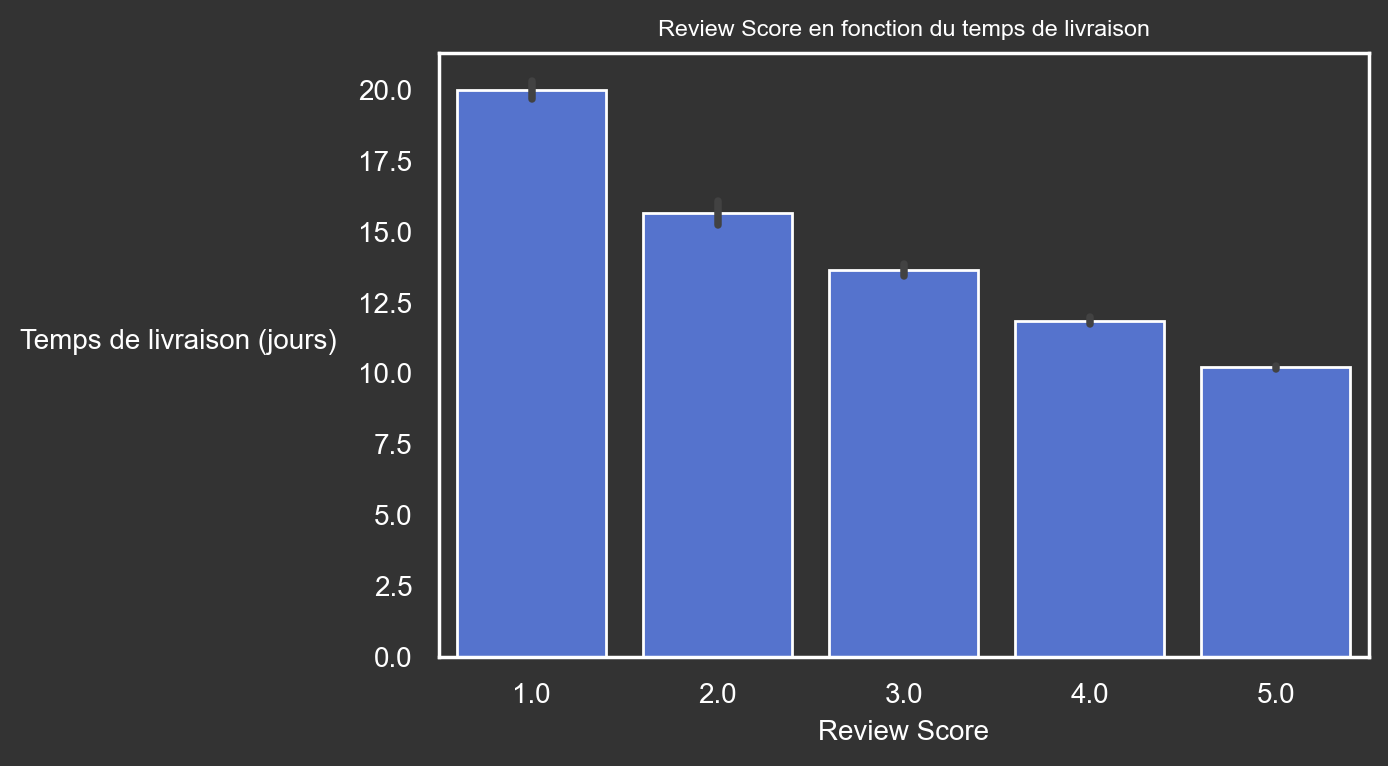

In [115]:
sns.barplot(x = "review_score", y = "delivery_time_days", 
data = df, color='royalblue')
plt.xlabel('Review Score', size = 10, color = 'white')
plt.gca().yaxis.set_label_coords( - 0.28, 0.5)
plt.ylabel('Temps de livraison (jours)', 
size = 10, rotation = 360, color = 'white')
plt.title('Review Score en fonction du temps de livraison')
plt.xticks(fontsize = 10, color = 'white')
plt.yticks(fontsize = 10, color = 'white')
plt.grid(False)
plt.show()

<font size="5">3. Analyse Quanti/Quanti</font>

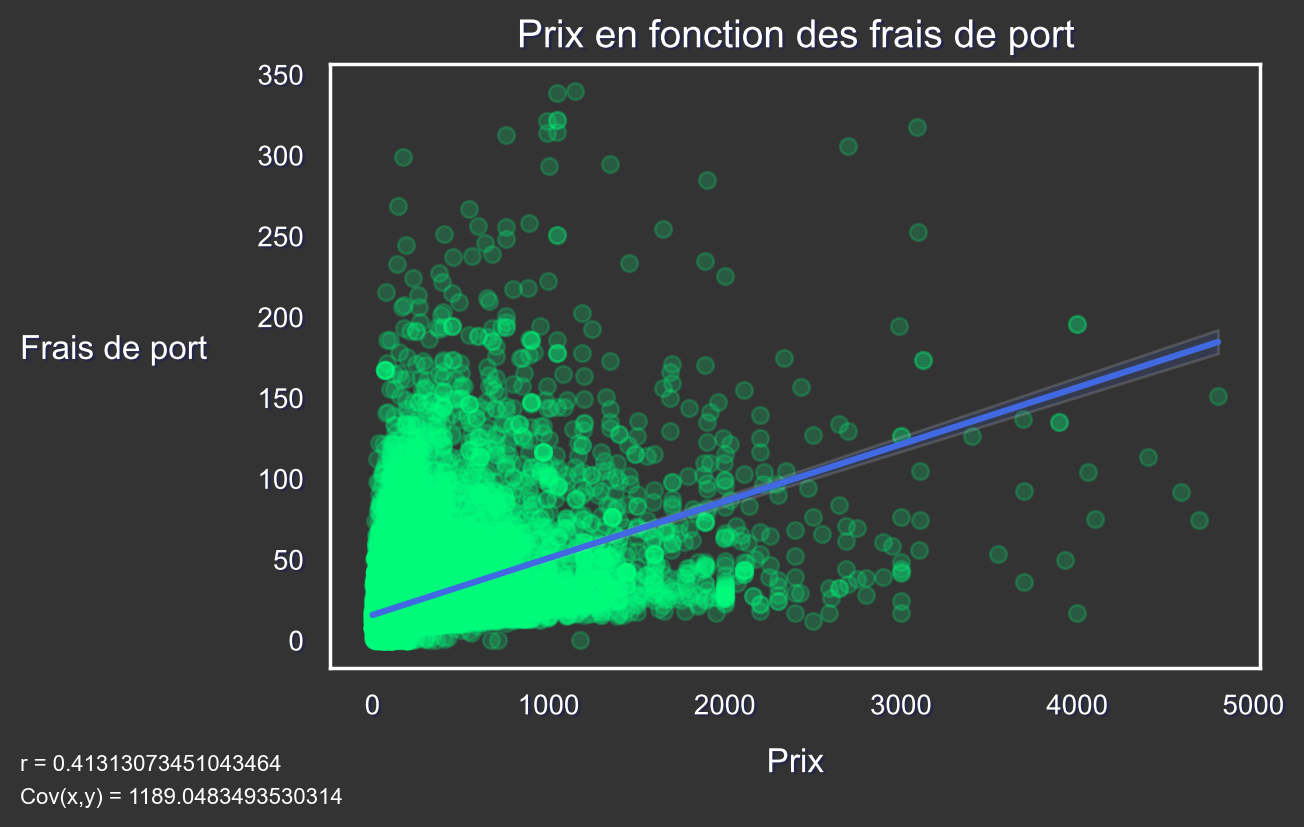

In [136]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df["price"], df["freight_value"])[0]
# même chose pour la covariance
cov_value = np.cov(df["price"], df["freight_value"], ddof = 0)[1,0]

#customisation du graph
plt.title("Prix en fonction des frais de port", fontsize = 14)
plt.xticks(fontsize = 10, color = 'white')
plt.yticks(fontsize = 10, color = 'white')

ax = sns.regplot(x = "price", y = "freight_value", data = df, 
color = 'springgreen', line_kws = {"color":"royalblue"}, 
scatter_kws = {"alpha":0.2, "edgecolor":"springgreen"}, marker = 'o')

plt.xlabel("Prix", color = 'white', size = 12, labelpad = 10)
plt.gca().yaxis.set_label_coords( - 0.233, 0.5)
plt.ylabel("Frais de port", color = 'white', size = 12, rotation = 360)
plt.text( - 2000,  - 80, 'r = {}'.format(r_value), color = 'white', size = 8)
plt.text( - 2000,  - 100.5, 'Cov(x,y) = {}'.format(cov_value), 
color = 'white', size = 8)
ax.grid(False)
# Appliquer les effets de texte aux titres
for title in [ax.title, ax.xaxis.label, ax.yaxis.label]:
    title.set_path_effects([shadow])

# Appliquer les effets de texte aux ticks
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels():
    tick.set_path_effects([shadow])
plt.show()

<font size="5">4. Analyse Quanti/Quali</font>

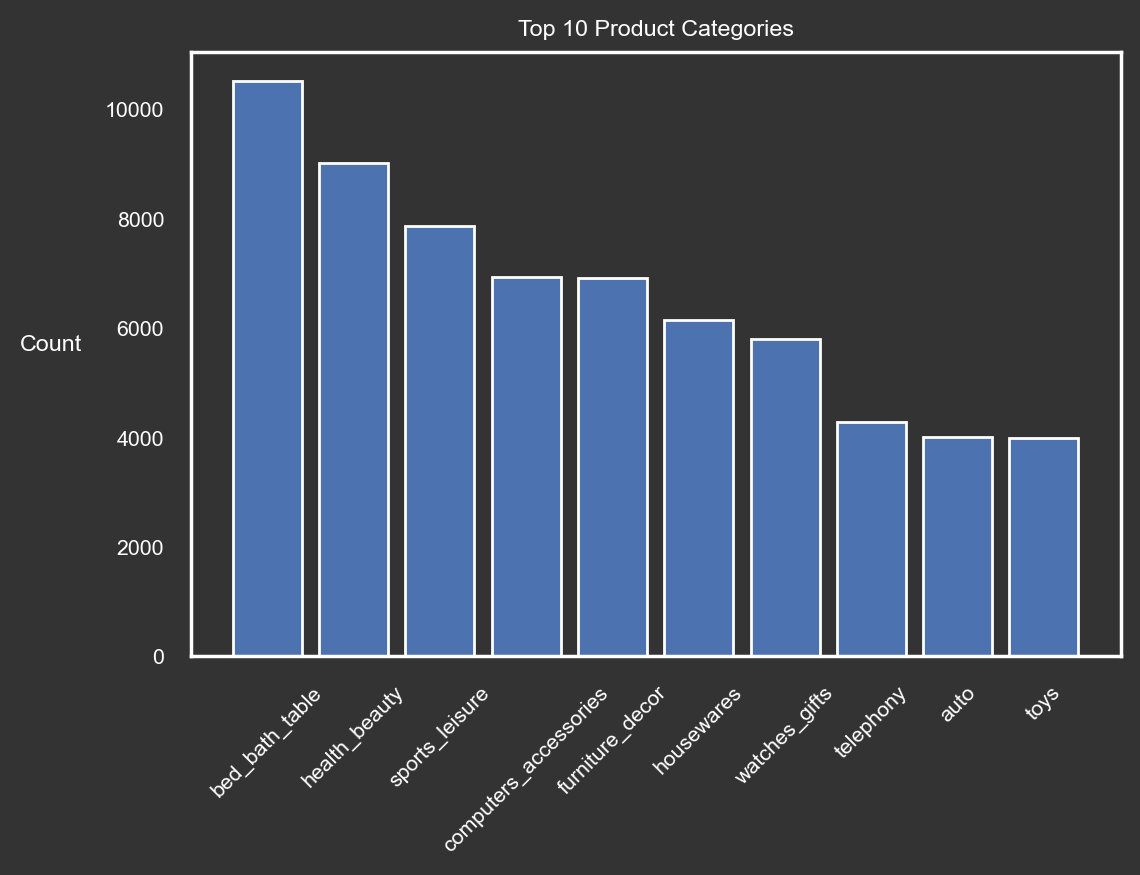

In [118]:
category_counts = df['product_category_name_english'].value_counts().head(10)

plt.bar(category_counts.index, category_counts.values)
plt.ylabel('Count', color = 'white', rotation = 360)
plt.title('Top 10 Product Categories', color = 'white')
plt.gca().yaxis.set_label_coords( - 0.15, 0.5)
plt.xticks(rotation = 45, color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

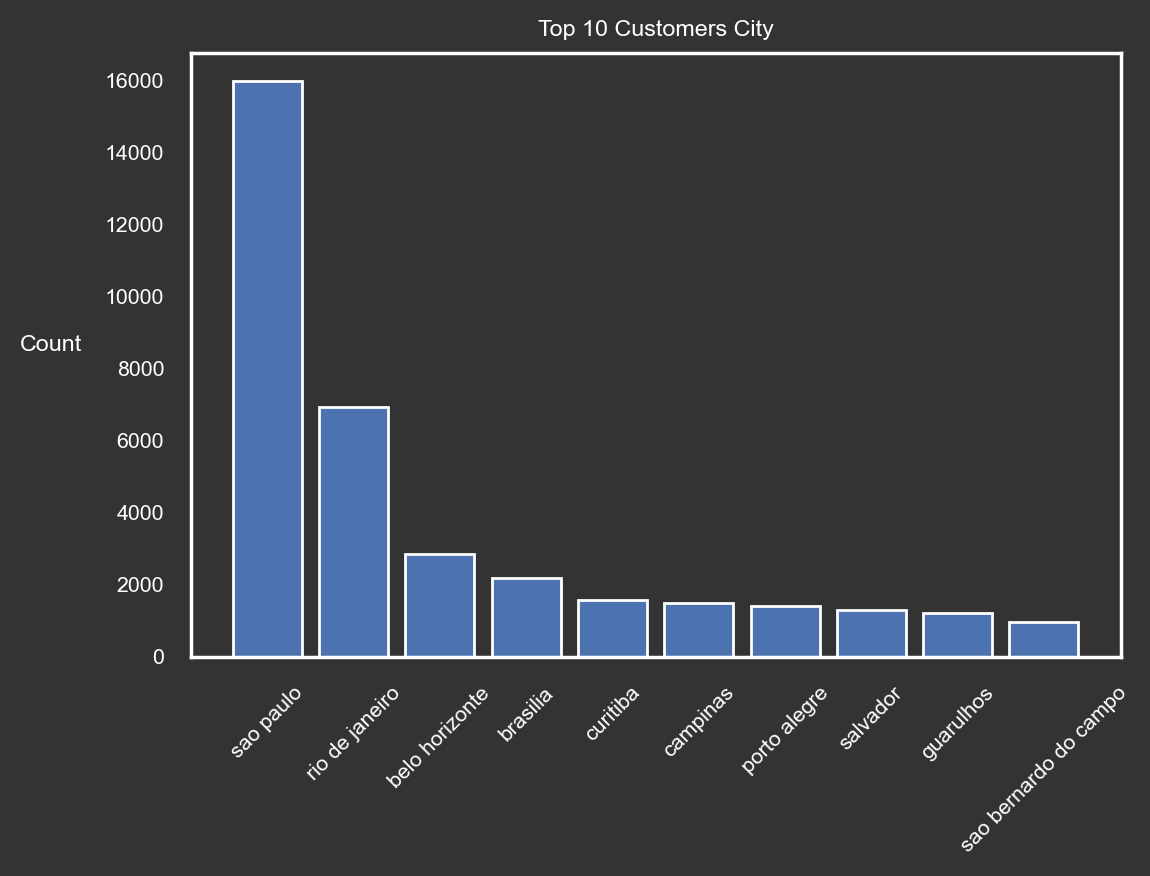

In [120]:
category_counts = df['customer_city'].value_counts().head(10)

plt.bar(category_counts.index, category_counts.values)
plt.ylabel('Count', color = 'white', rotation = 360)
plt.title('Top 10 Customers City', color = 'white')
plt.gca().yaxis.set_label_coords( - 0.15, 0.5)
plt.xticks(rotation = 45, color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

In [119]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
review_score                            float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_city                              object
seller_state                             object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_purchase_datetime          datetime64[ns]
order_delivered_datetime         datetime64[ns]
month                                     int64
year                                    

<font size="5">5. Analyse Quali/Quali</font>

In [121]:
# Définissez le dictionnaire de correspondance
correspondance = {1: 'E', 2: 'D', 3: 'C', 4: 'B', 5: 'A'}

# Utilisez la méthode map() pour créer 
# une nouvelle colonne avec les lettres correspondantes
df['review_letter'] = df['review_score'].map(correspondance)

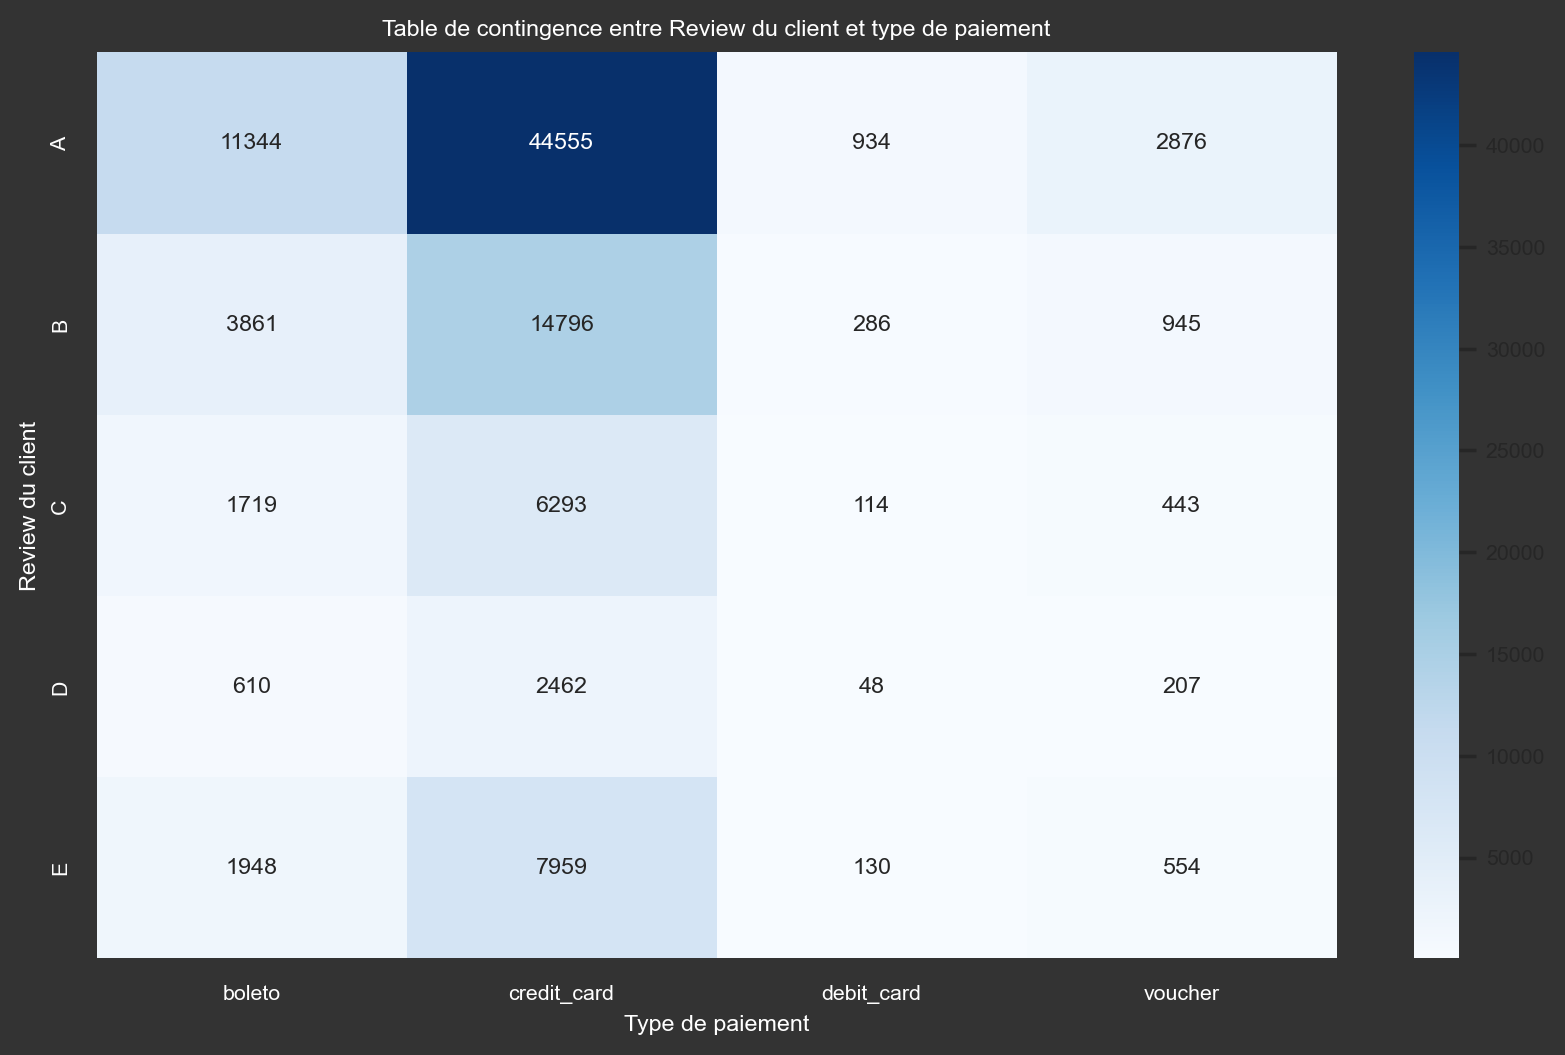

In [122]:
# Créer une table de contingence entre les variables qualitatives
contingency_table = pd.crosstab(df['review_letter'], df['payment_type'])

# Afficher un graphique en barres empilées
plt.figure(figsize = (10, 6))
sns.heatmap(contingency_table, annot = True, fmt = "d", cmap = "Blues")
plt.title("Table de contingence entre Review du client et type de paiement")
plt.xlabel("Type de paiement", color = "white")
plt.ylabel("Review du client", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")

plt.show()

<font size="5">6. ACP</font>

In [123]:
df = pd.read_csv('olist_master.csv')

In [126]:
df.shape

(102084, 27)

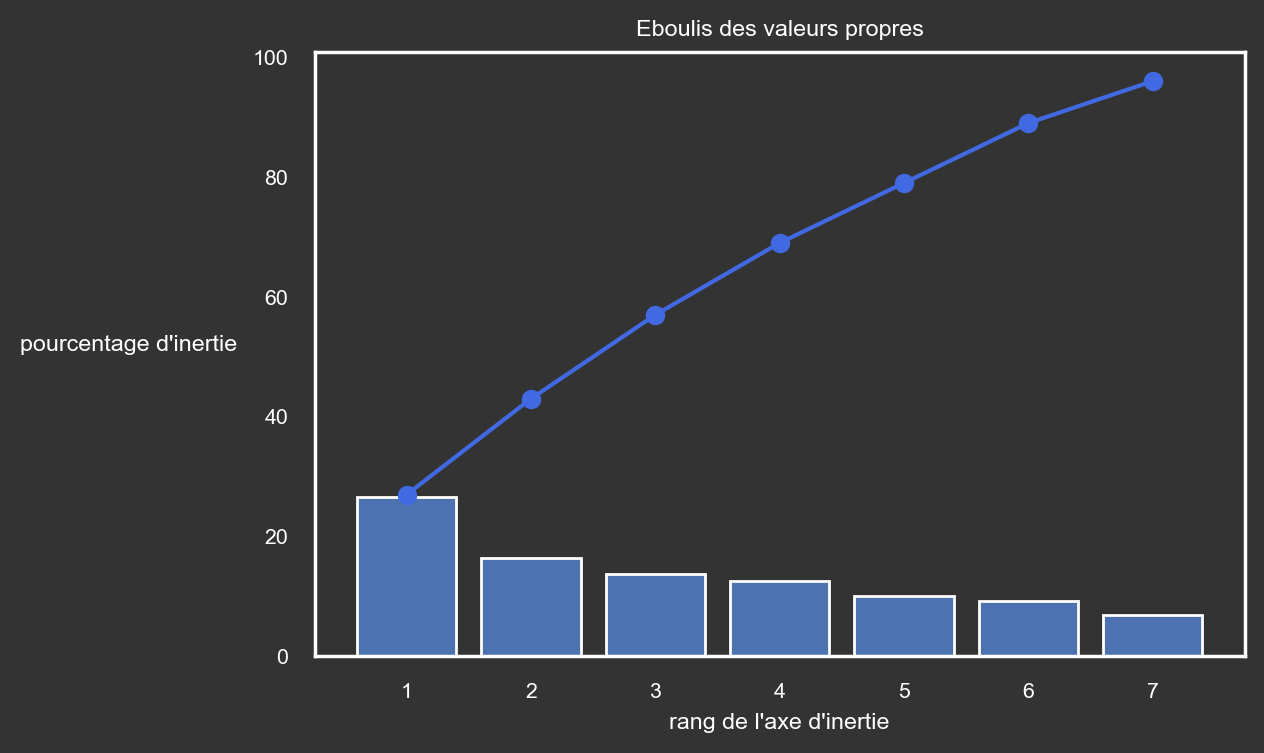

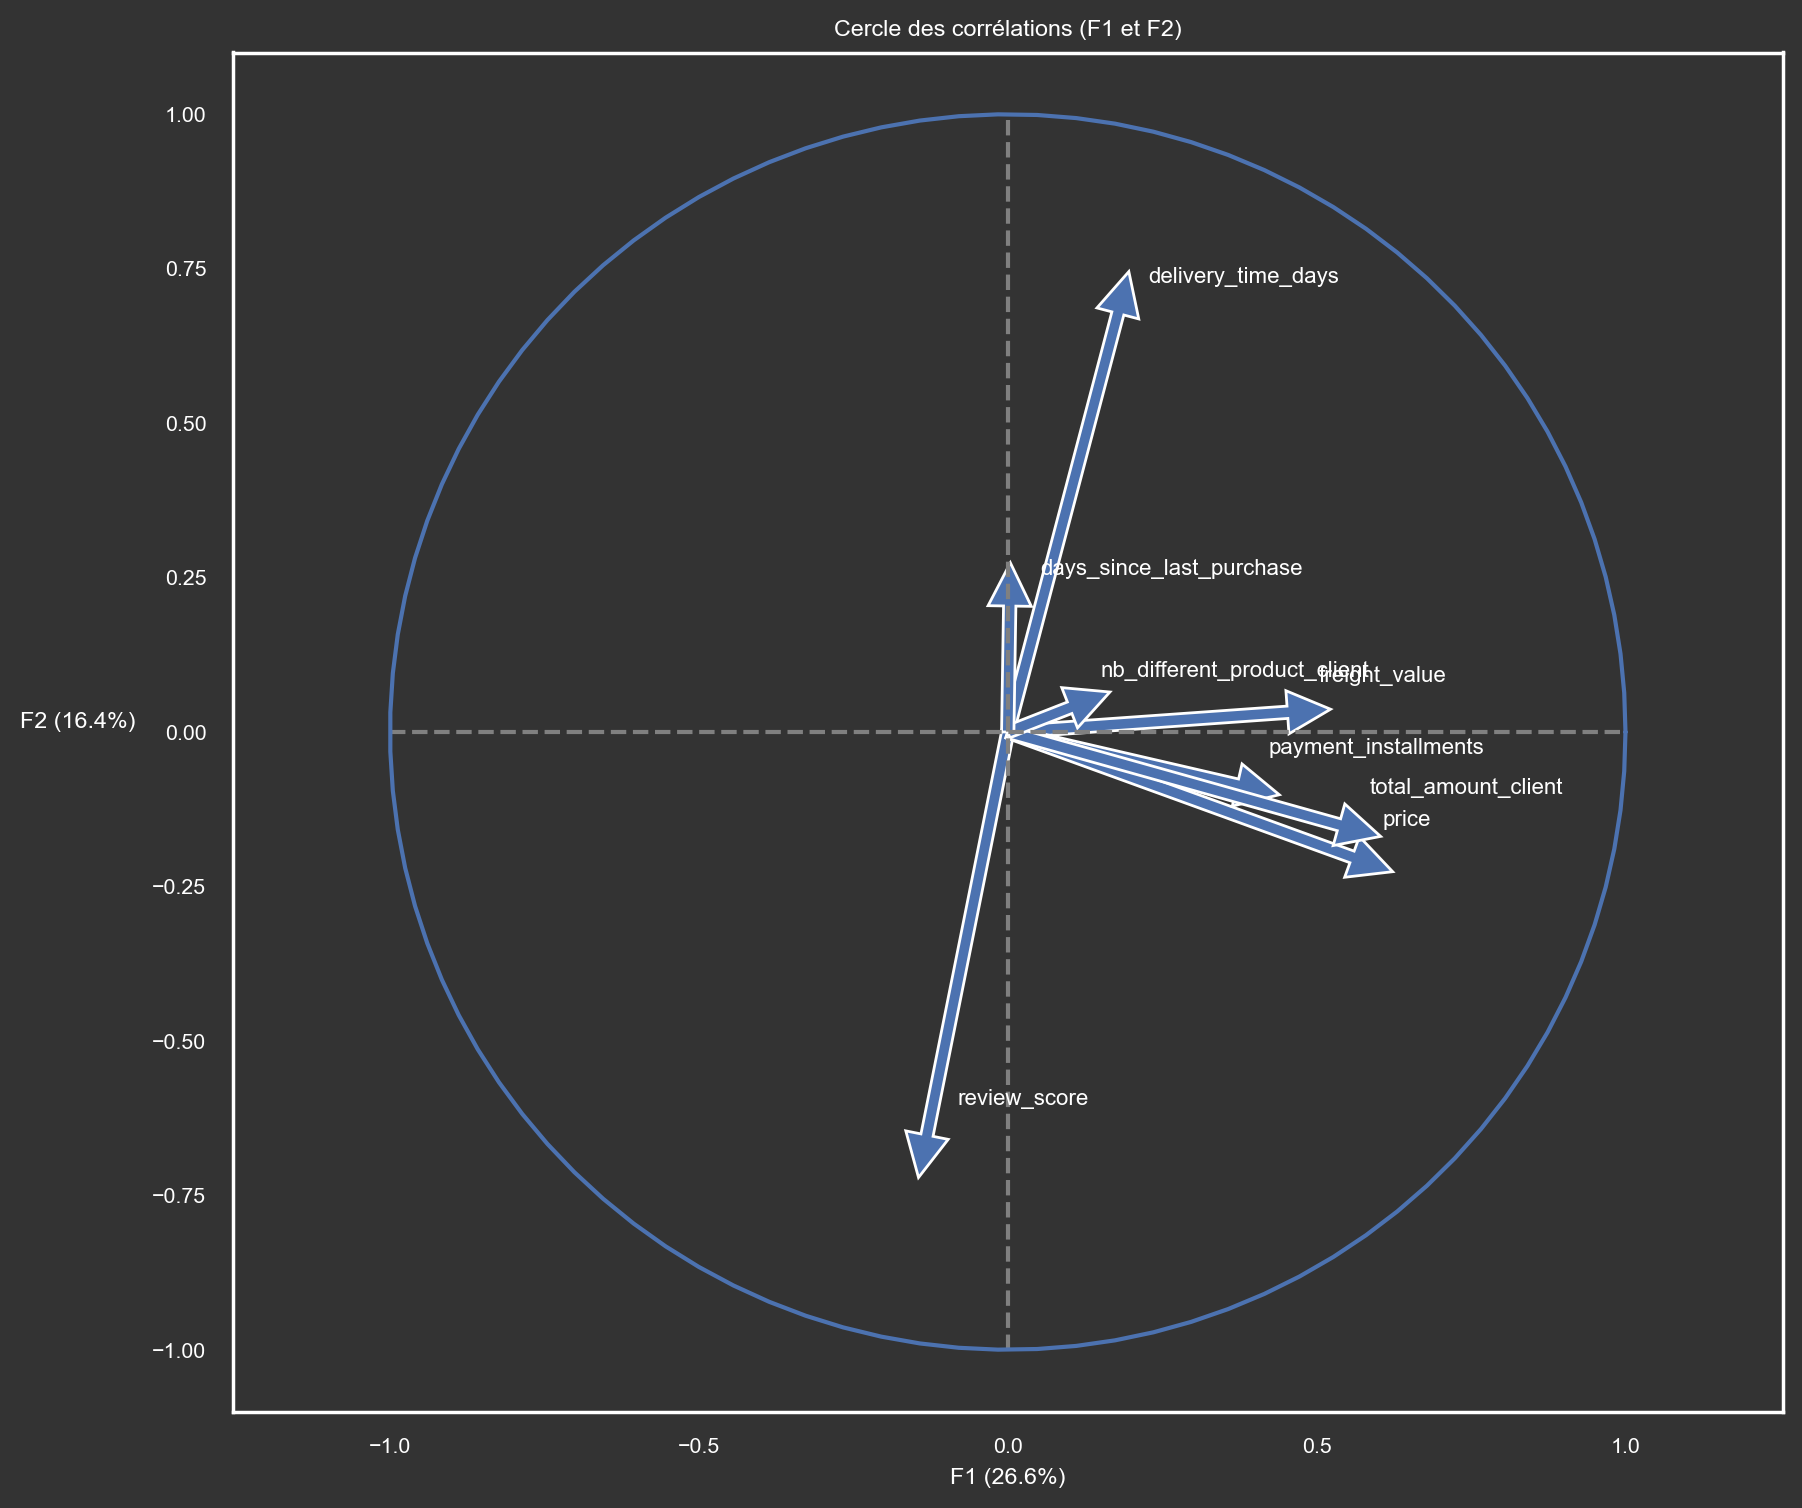

In [137]:
# suppression des variables non numériques
df_pca = df.select_dtypes(include = [np.number])
df_pca = df_pca.drop(columns = ['month', 'year',
'nb_purchase_last_3_months', 'payment_value', 'average_price_cat'])
X = df_pca.values
names = df_pca.index
features = df_pca.columns

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# préciser le nombre de components
n_components = 7

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components = n_components)
pca.fit(X_scaled)

pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree

# on arrondit à la somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c = "royalblue",marker = 'o')
plt.xlabel("rang de l'axe d'inertie", color = 'white')
plt.gca().yaxis.set_label_coords(-0.2, 0.5)
plt.ylabel("pourcentage d'inertie", color = 'white', rotation = 360)
plt.title("Eboulis des valeurs propres", color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show(block = False)
x,y = 0,1
fig, ax = plt.subplots(figsize = (10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width = 0.07,
             head_length = 0.07, 
             width = 0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i], fontsize = 8)
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color = 'grey', ls = '--')
plt.plot([0, 0], [-1, 1], color = 'grey', ls = '--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x + 1, 
round(100 * pca.explained_variance_ratio_[x], 1)), color = 'white')
plt.ylabel('F{} ({}%)'.format(y + 1, round(
100 * pca.explained_variance_ratio_[y],1)), color = 'white', rotation = 360)

plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.gca().yaxis.set_label_coords( - 0.1, 0.5)
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.grid(False)
plt.show(block = False)